# Normalformen

Normalisierung ist ein systematischer Ansatz zur Entwurfsoptimierung von relationalen Datenbanken, um Duplikationen zu minimieren und die Integrität der Daten sicherzustellen. Das Konzept der Normalisierung wurde erstmals in den 1970er Jahren von Edgar Codd, dem Erfinder des relationalen Datenbankmodells, vorgestellt.

Es gibt verschiedene "Normalformen", wobei jede Normalform spezifische Anforderungen hat. Eine Datenbank kann in einer bestimmten Normalform sein, was bedeutet, dass sie alle Anforderungen bis zu dieser Normalform erfüllt. Die meisten relationalen Datenbanken streben an, mindestens in der dritten Normalform (3NF) zu sein.

## 1\. Normalform (1NF)

- Jede Tabelle hat einen eindeutigen Primärschlüssel.
- Alle Attribute (Spalten) in einer Tabelle sind atomar, d.h. sie enthalten nur einzelne Werte (keine Mengen oder Listen).
- Es gibt keine wiederholenden Gruppen oder Arrays.

## 2\. Normalform (2NF)

- Die Datenbank muss bereits in 1NF sein.
- Es werden alle partiellen Abhängigkeiten von Nicht-Schlüsselattributen auf Teilen eines zusammengesetzten Primärschlüssels entfernt. In anderen Worten, Nicht-Schlüsselattribute sind von dem gesamten zusammengesetzten Schlüssel abhängig und nicht nur von einem Teil davon.

## 3\. Normalform (3NF)

- Die Datenbank muss bereits in 2NF sein.
- Alle transitive Abhängigkeiten von Nicht-Schlüsselattributen werden entfernt. Ein Attribut sollte also nur vom Primärschlüssel der Tabelle abhängen und nicht von anderen Nicht-Schlüsselattributen.

## Boyce-Codd Normalform (BCNF)

- Eine strenge Version der 3NF. Sie ist in den meisten Fällen identisch mit der 3NF, außer wenn es mehrere mögliche Kandidatenschlüssel gibt. In BCNF sollte jedes Attribut, das nicht voll funktional vom Primärschlüssel abhängig ist, selbst ein Schlüssel sein.

## 4\. Normalform (4NF)

- Die Datenbank muss bereits in BCNF sein.
- Es werden alle multiwertigen Abhängigkeiten entfernt, bei denen ein Attribut von einem anderen Attribut und nicht von dem Primärschlüssel abhängig ist.

Es gibt noch weitere, höhere Normalformen, aber die ersten drei (plus BCNF) sind die am häufigsten verwendeten. Das Ziel der Normalisierung ist es, Redundanz zu reduzieren und die Integrität der Daten sicherzustellen. Es ist jedoch wichtig zu bemerken, dass es manchmal in der Praxis sinnvoll ist, von der strikten Normalisierung abzuweichen, um die Leistung zu optimieren oder spezifische Anwendungsanforderungen zu erfüllen.

In [62]:
USE MASTER;
GO
DROP DATABASE IF EXISTS Normalform_Example ;
GO
CREATE DATABASE Normalform_Example;
GO
USE Normalform_Example;

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.918

# Ausgangslage

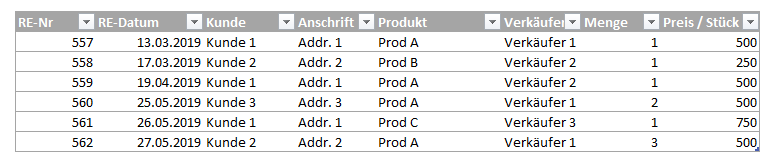

In [63]:
DROP Table if EXISTS Rechnungen;
CREATE TABLE Rechnungen (
    RE_Nr INT PRIMARY KEY,
    RE_Datum DATE,
    Kunde VARCHAR(50),
    Anschrift VARCHAR(255),
    Produkt VARCHAR(50),
    Verkäufer VARCHAR(50),
    Menge INT,
    Preis_pro_Stück DECIMAL(10,2)
);

INSERT INTO Rechnungen VALUES
(557, '2019-03-13', 'Kunde 1', 'Addr. 1, 8020, Graz', 'Prod A', 'Verkäufer 1', 1, 500),
(558, '2019-03-17', 'Kunde 2', 'Addr. 2, 8020, Graz', 'Prod B', 'Verkäufer 2', 1, 250),
(559, '2019-04-19', 'Kunde 1', 'Addr. 1, 8020, Graz', 'Prod A', 'Verkäufer 2', 1, 500),
(560, '2019-05-25', 'Kunde 3', 'Addr. 3, 8010, Graz', 'Prod A', 'Verkäufer 1', 2, 500),
(561, '2019-05-26', 'Kunde 1', 'Addr. 1, 8020, Graz', 'Prod C', 'Verkäufer 3', 1, 750),
(562, '2019-05-27', 'Kunde 2', 'Addr. 2, 8020, Graz', 'Prod A', 'Verkäufer 1', 3, 500);

(6 rows affected)

Total execution time: 00:00:00.181

In [64]:
Select * from Rechnungen

(6 rows affected)

Total execution time: 00:00:00.038

RE_Nr,RE_Datum,Kunde,Anschrift,Produkt,Verkäufer,Menge,Preis_pro_Stück
557,2019-03-13,Kunde 1,"Addr. 1, 8020, Graz",Prod A,Verkäufer 1,1,500.00
558,2019-03-17,Kunde 2,"Addr. 2, 8020, Graz",Prod B,Verkäufer 2,1,250.00
559,2019-04-19,Kunde 1,"Addr. 1, 8020, Graz",Prod A,Verkäufer 2,1,500.00
560,2019-05-25,Kunde 3,"Addr. 3, 8010, Graz",Prod A,Verkäufer 1,2,500.00
561,2019-05-26,Kunde 1,"Addr. 1, 8020, Graz",Prod C,Verkäufer 3,1,750.00
562,2019-05-27,Kunde 2,"Addr. 2, 8020, Graz",Prod A,Verkäufer 1,3,500.00


# 1\. Normalform (1NF)

Die Erste Normalform (1NF) ist dann gegeben, wenn alle Informationen in einer Tabelle atomar vorliegen.

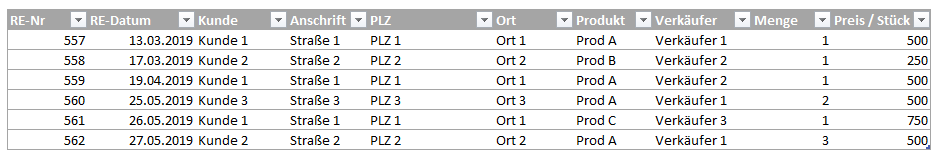

**Rohdaten zu 1. Normalform (1NF):**

- Rohdaten: Die ursprünglichen Daten wurden in einer einzelnen Tabelle präsentiert, in der mehrere Attribute wie "Kunde", "Anschrift" und "Produkt" kombiniert wurden.
- 1NF:
    - In der ersten Normalform müssen alle Spalten atomare (unteilbare) Werte haben. 
    - Es gibt keine doppelten Reihen.
    - Jeder Datenwert muss nur von der Primärschlüsselkombination abhängig sein.
    - In Ihrem Beispiel wurde die Anschrift in "Anschrift", "PLZ" und "Ort" aufgeteilt, um sicherzustellen, dass jeder Wert in der Tabelle unteilbar ist.

In [65]:
Drop TABLE if EXISTS Rechnungen_1NF
GO

Commands completed successfully.

Total execution time: 00:00:00

In [66]:
CREATE TABLE Rechnungen_1NF (
    RE_Nr INT PRIMARY KEY,
    RE_Datum DATE,
    Kunde VARCHAR(50),
    Anschrift VARCHAR(255),
    PLZ VARCHAR(10),
    Ort VARCHAR(50),
    Produkt VARCHAR(50),
    Verkäufer VARCHAR(50),
    Menge INT,
    Preis_pro_Stück DECIMAL(10,2)
);

Commands completed successfully.

Total execution time: 00:00:00.004

In [67]:
INSERT INTO Rechnungen_1NF (RE_Nr, RE_Datum, Kunde, Anschrift, PLZ, Ort, Produkt, Verkäufer, Menge, Preis_pro_Stück)
SELECT 
    RE_Nr, 
    RE_Datum, 
    Kunde, 
    SUBSTRING(Anschrift, 1, CHARINDEX(',', Anschrift) - 1) AS Anschrift, -- Nimmt den Teil vor dem ersten Komma
    LTRIM(RTRIM(SUBSTRING(Anschrift, CHARINDEX(',', Anschrift) + 1, CHARINDEX(',', Anschrift, CHARINDEX(',', Anschrift) + 1) - CHARINDEX(',', Anschrift) - 1))) AS PLZ, -- Nimmt den Teil zwischen dem ersten und dem zweiten Komma
    LTRIM(RTRIM(SUBSTRING(Anschrift, CHARINDEX(',', Anschrift, CHARINDEX(',', Anschrift) + 1) + 1, LEN(Anschrift)))) AS Ort, -- Nimmt den Teil nach dem letzten Komma
    Produkt, 
    Verkäufer, 
    Menge, 
    Preis_pro_Stück
FROM Rechnungen;
GO

(6 rows affected)

Total execution time: 00:00:00.003

In [68]:
Select * from Rechnungen_1NF
GO

(6 rows affected)

Total execution time: 00:00:00.013

RE_Nr,RE_Datum,Kunde,Anschrift,PLZ,Ort,Produkt,Verkäufer,Menge,Preis_pro_Stück
557,2019-03-13,Kunde 1,Addr. 1,8020,Graz,Prod A,Verkäufer 1,1,500.00
558,2019-03-17,Kunde 2,Addr. 2,8020,Graz,Prod B,Verkäufer 2,1,250.00
559,2019-04-19,Kunde 1,Addr. 1,8020,Graz,Prod A,Verkäufer 2,1,500.00
560,2019-05-25,Kunde 3,Addr. 3,8010,Graz,Prod A,Verkäufer 1,2,500.00
561,2019-05-26,Kunde 1,Addr. 1,8020,Graz,Prod C,Verkäufer 3,1,750.00
562,2019-05-27,Kunde 2,Addr. 2,8020,Graz,Prod A,Verkäufer 1,3,500.00


Die oben genannten SQL-Statements basieren auf der Annahme, dass die Adressen immer im gleichen Format sind ("Straße, PLZ, Ort"). Wenn das Format unterschiedlich ist, könnte das Statement nicht wie erwartet funktionieren. Das Aufteilen von Zeichenketten kann auch mit anderen SQL-Funktionen oder -Techniken erfolgen, je nach den genauen Anforderungen und Daten.

# 2\. Normalform (2NF)

Ein Relationstyp (Tabelle) befindet sich genau dann in der zweiten Normalform (2NF), wenn er sich in der ersten Normalform (1NF) befindet und jedes Nichtschlüsselattribut von jedem Schlüsselkandidaten voll funktional abhängig ist.

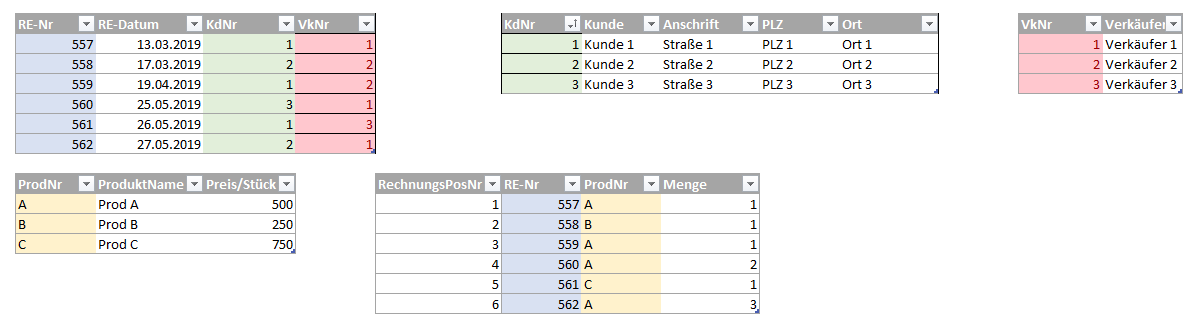

**1NF zu 2. Normalform (2NF):**

- 1NF: 
    - Die Daten sind atomar, aber es kann immer noch eine partielle Abhängigkeit von nicht-schlüsselattributen auf Teilen des zusammengesetzten Schlüssels geben.
    - In Ihrem Datenmodell gab es eine partielle Abhängigkeit, da der Kunde und der Verkäufer mehrfach wiederholt wurden.
- 2NF:
    - In der 2NF werden alle partiellen Abhängigkeiten von Nicht-Schlüsselattributen auf Teilen eines zusammengesetzten Schlüssels entfernt.
    - Hier wurden separate Tabellen für Kunden und Verkäufer erstellt, um die Redundanz zu beseitigen und die Datenintegrität zu gewährleisten.
    - Das hat zur Folge, dass jede Tabelle nur von ihrem jeweiligen Primärschlüssel abhängt und nicht von einem anderen nicht-schlüsselattribut.

In [69]:
-- Löschen aller Fremdschlüssel
DECLARE @Sql NVARCHAR(MAX) = '';
DECLARE @TableName NVARCHAR(128);

-- Erstelle eine temporäre Tabelle, um die Tabellennamen zu speichern
DECLARE @Tables TABLE (TableName NVARCHAR(128));
INSERT INTO @Tables (TableName)
VALUES ('Kunden_2NF'), ('Verkäufer_2NF'), ('Produkte_2NF'), ('Rechnungen_2NF'), ('Rechnungspositionen_2NF');

-- Beginne die Iteration über die Tabellennamen
WHILE (SELECT COUNT(*) FROM @Tables) > 0
BEGIN
    -- Hole den ersten Tabellennamen
    SELECT TOP 1 @TableName = TableName FROM @Tables;

    -- Generiere DROP-Anweisungen für jeden Fremdschlüssel
    SET @Sql = '';
    SELECT @Sql += 'ALTER TABLE ' + QUOTENAME(OBJECT_SCHEMA_NAME(parent_object_id))
        + '.' + QUOTENAME(OBJECT_NAME(parent_object_id)) 
        + ' DROP CONSTRAINT ' + QUOTENAME(name) + '; ' 
    FROM sys.foreign_keys
    WHERE OBJECT_NAME(parent_object_id) = @TableName;

    -- Führe das generierte SQL-Statement aus, wenn es nicht leer ist
    IF LEN(@Sql) > 0
        EXEC sp_executesql @Sql;

    -- Lösche den bearbeiteten Tabellennamen, um zum nächsten zu gelangen
    DELETE FROM @Tables WHERE TableName = @TableName;
END;


(5 rows affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.032

In [70]:
Drop Table if EXISTS Kunden_2NF
Drop Table if EXISTS Verkäufer_2NF
Drop Table if EXISTS Produkte_2NF
Drop Table if EXISTS Rechnungen_2NF
Drop Table if EXISTS Rechnungspositionen_2NF

Commands completed successfully.

Total execution time: 00:00:00

In [71]:
-- Kunden Tabelle
CREATE TABLE Kunden_2NF (
    KdNr INT PRIMARY KEY IDENTITY(1,1),
    Kunde VARCHAR(50),
    Anschrift VARCHAR(255),
    PLZ VARCHAR(10),
    Ort VARCHAR(50)
);

-- Verkäufer Tabelle
CREATE TABLE Verkäufer_2NF (
    VkNr INT PRIMARY KEY IDENTITY(1,1),
    Verkäufer VARCHAR(50)
);

-- Produkte Tabelle
CREATE TABLE Produkte_2NF (
    ProdNr INT PRIMARY KEY IDENTITY(1,1),
    ProduktName VARCHAR(50),
    Preis_pro_Stück DECIMAL(10,2)
);

-- Rechnungen Tabelle
CREATE TABLE Rechnungen_2NF (
    RE_Nr INT PRIMARY KEY IDENTITY(1,1),
    RE_Datum DATE,
    KdNr INT,
    VkNr INT,
    FOREIGN KEY (KdNr) REFERENCES Kunden_2NF(KdNr),
    FOREIGN KEY (VkNr) REFERENCES Verkäufer_2NF(VkNr)
);

-- Rechnungspositionen Tabelle
CREATE TABLE Rechnungspositionen_2NF (
    RechnungsPosNr INT PRIMARY KEY IDENTITY(1,1),
    RE_Nr INT,
    ProdNr INT,
    Menge INT,
    FOREIGN KEY (RE_Nr) REFERENCES Rechnungen_2NF(RE_Nr),
    FOREIGN KEY (ProdNr) REFERENCES Produkte_2NF(ProdNr)
);

Commands completed successfully.

Total execution time: 00:00:00.015

In [72]:
-- Daten in die Kunden Tabelle einfügen
INSERT INTO Kunden_2NF (Kunde, Anschrift, PLZ, Ort)
SELECT DISTINCT Kunde, Anschrift, PLZ, Ort
FROM Rechnungen_1NF;

-- Daten in die Verkäufer Tabelle einfügen
INSERT INTO Verkäufer_2NF (Verkäufer)
SELECT DISTINCT Verkäufer
FROM Rechnungen_1NF;

-- Daten in die Produkte Tabelle einfügen
INSERT INTO Produkte_2NF (ProduktName, Preis_pro_Stück)
Select Distinct Produkt as ProduktName, Preis_pro_Stück 
from Rechnungen_1NF

-- Daten in die Rechnungen Tabelle einfügen
SET IDENTITY_INSERT Rechnungen_2NF ON;

INSERT INTO Rechnungen_2NF (RE_Nr, RE_Datum, KdNr, VkNr)
SELECT 
    r.RE_Nr, 
    r.RE_Datum, 
    k.KdNr, 
    v.VkNr
FROM Rechnungen_1NF r
JOIN Kunden_2NF k ON r.Kunde = k.Kunde
JOIN Verkäufer_2NF v ON r.Verkäufer = v.Verkäufer;

SET IDENTITY_INSERT Rechnungen_2NF OFF;


-- Daten in die Rechnungspositionen Tabelle einfügen
INSERT INTO Rechnungspositionen_2NF (RE_Nr, ProdNr, Menge)
SELECT 
    r.RE_Nr, 
    p.ProdNr, 
    r.Menge
FROM Rechnungen_1NF r
JOIN Produkte_2NF p ON r.Produkt = p.ProduktName;

(3 rows affected)

(3 rows affected)

(3 rows affected)

(6 rows affected)

(6 rows affected)

Total execution time: 00:00:00.091

In [73]:
-- Daten aus der Kunden Tabelle abrufen
SELECT * FROM Kunden_2NF;

-- Daten aus der Verkäufer Tabelle abrufen
SELECT * FROM Verkäufer_2NF;

-- Daten aus der Produkte Tabelle abrufen
SELECT * FROM Produkte_2NF;

-- Daten aus der Rechnungen Tabelle abrufen
SELECT * FROM Rechnungen_2NF;

-- Daten aus der Rechnungspositionen Tabelle abrufen
SELECT * FROM Rechnungspositionen_2NF;

(3 rows affected)

(3 rows affected)

(3 rows affected)

(6 rows affected)

(6 rows affected)

Total execution time: 00:00:00.032

KdNr,Kunde,Anschrift,PLZ,Ort
1,Kunde 1,Addr. 1,8020,Graz
2,Kunde 2,Addr. 2,8020,Graz
3,Kunde 3,Addr. 3,8010,Graz


VkNr,Verkäufer
1,Verkäufer 1
2,Verkäufer 2
3,Verkäufer 3


ProdNr,ProduktName,Preis_pro_Stück
1,Prod A,500.00
2,Prod B,250.00
3,Prod C,750.00


RE_Nr,RE_Datum,KdNr,VkNr
557,2019-03-13,1,1
558,2019-03-17,2,2
559,2019-04-19,1,2
560,2019-05-25,3,1
561,2019-05-26,1,3
562,2019-05-27,2,1


RechnungsPosNr,RE_Nr,ProdNr,Menge
1,557,1,1
2,559,1,1
3,560,1,2
4,562,1,3
5,558,2,1
6,561,3,1


# 3\. Normalform (3NF)

Ein Relationstyp befindet sich genau dann in der dritten Normalform (3NF), wenn er sich in der zweiten Normalform (2NF) befindet und kein Nichtschlüsselattribut transitiv von einem Kandidatenschlüssel abhängt.

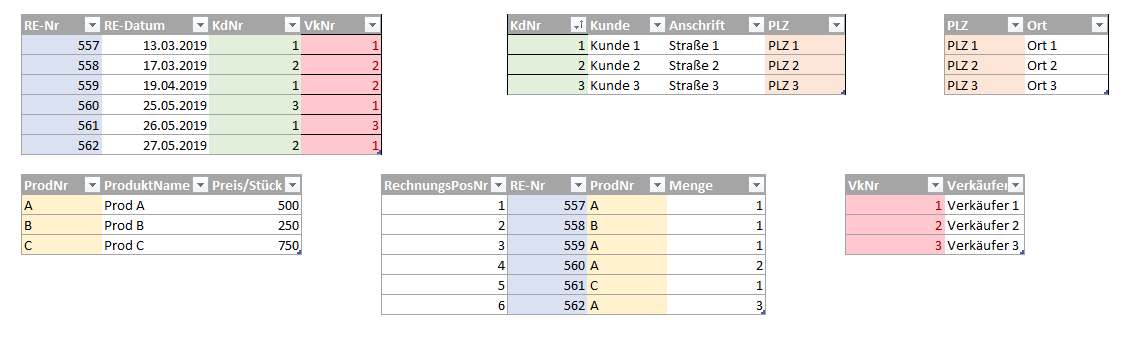

**2NF zu 3. Normalform (3NF):**

- 2NF:
    - Alle partiellen Abhängigkeiten wurden entfernt, aber es können immer noch transitive Abhängigkeiten bestehen, bei denen ein Attribut nicht direkt vom Primärschlüssel, sondern von einem anderen Attribut abhängig ist. 
    - In Ihrem Datenmodell gab es eine solche Abhängigkeit: Die Tabelle Kunden\_2NF enthielt sowohl "PLZ" als auch "Ort", was zu einer potenziellen Redundanz führen kann.
- 3NF:
    - In der 3NF werden alle transitive Abhängigkeiten von Nicht-Schlüsselattributen entfernt.
    - Um diese Redundanz zu beseitigen, wurde die "Ort" Information in eine separate Tabelle namens PLZ\_Ort überführt, wobei die "PLZ" als Schlüssel dient. Somit wird sichergestellt, dass "Ort" nicht mehr transitiv von "KdNr" in der Kunden\_3NF Tabelle abhängig ist, sondern direkt von der "PLZ".

In [74]:
-- Löschen aller Fremdschlüssel
DECLARE @Sql NVARCHAR(MAX) = '';
DECLARE @TableName NVARCHAR(128);

-- Erstelle eine temporäre Tabelle, um die Tabellennamen zu speichern
DECLARE @Tables TABLE (TableName NVARCHAR(128));
INSERT INTO @Tables (TableName)
VALUES ('Kunden_3NF'), ('PLZ_Ort'), ('Verkäufer_3NF'), ('Produkte_3NF'), ('Rechnungen_3NF'), ('Rechnungspositionen_3NF');

-- Beginne die Iteration über die Tabellennamen
WHILE (SELECT COUNT(*) FROM @Tables) > 0
BEGIN
    -- Hole den ersten Tabellennamen
    SELECT TOP 1 @TableName = TableName FROM @Tables;

    -- Generiere DROP-Anweisungen für jeden Fremdschlüssel
    SET @Sql = '';
    SELECT @Sql += 'ALTER TABLE ' + QUOTENAME(OBJECT_SCHEMA_NAME(parent_object_id))
        + '.' + QUOTENAME(OBJECT_NAME(parent_object_id)) 
        + ' DROP CONSTRAINT ' + QUOTENAME(name) + '; ' 
    FROM sys.foreign_keys
    WHERE OBJECT_NAME(parent_object_id) = @TableName;

    -- Führe das generierte SQL-Statement aus, wenn es nicht leer ist
    IF LEN(@Sql) > 0
        EXEC sp_executesql @Sql;

    -- Lösche den bearbeiteten Tabellennamen, um zum nächsten zu gelangen
    DELETE FROM @Tables WHERE TableName = @TableName;
END;


(6 rows affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.033

In [75]:
Drop Table if EXISTS Kunden_3NF
Drop Table if EXISTS PLZ_Ort
Drop Table if EXISTS Verkäufer_3NF
Drop Table if EXISTS Produkte_3NF
Drop Table if EXISTS Rechnungen_3NF
Drop Table if Exists Rechnungspositionen_3NF

Commands completed successfully.

Total execution time: 00:00:00.001

In [76]:
-- PLZ und Ort Tabelle
CREATE TABLE PLZ_Ort (
    PLZ VARCHAR(10) PRIMARY KEY,
    Ort VARCHAR(50)
);

-- Kunden Tabelle
CREATE TABLE Kunden_3NF (
    KdNr INT PRIMARY KEY,
    Kunde VARCHAR(50),
    Anschrift VARCHAR(255),
    PLZ VARCHAR(10),
    FOREIGN KEY (PLZ) REFERENCES PLZ_Ort(PLZ)
);

-- Verkäufer Tabelle
CREATE TABLE Verkäufer_3NF (
    VkNr INT PRIMARY KEY,
    Verkäufer VARCHAR(50)
);

-- Produkte Tabelle
CREATE TABLE Produkte_3NF (
    ProdNr int PRIMARY KEY,
    ProduktName VARCHAR(50),
    Preis_pro_Stück DECIMAL(10,2)
);

-- Rechnungen Tabelle
CREATE TABLE Rechnungen_3NF (
    RE_Nr INT PRIMARY KEY,
    RE_Datum DATE,
    KdNr INT,
    VkNr INT,
    FOREIGN KEY (KdNr) REFERENCES Kunden_3NF(KdNr),
    FOREIGN KEY (VkNr) REFERENCES Verkäufer_3NF(VkNr)
);

-- Rechnungspositionen Tabelle
CREATE TABLE Rechnungspositionen_3NF (
    RechnungsPosNr INT IDENTITY(1,1),
    RE_Nr INT,
    ProdNr int,
    Menge INT,
    FOREIGN KEY (RE_Nr) REFERENCES Rechnungen_3NF(RE_Nr),
    FOREIGN KEY (ProdNr) REFERENCES Produkte_3NF(ProdNr)
);


Commands completed successfully.

Total execution time: 00:00:00.032

In [77]:
-- Daten in die PLZ und Ort Tabelle einfügen
INSERT INTO PLZ_Ort (PLZ, Ort)
SELECT DISTINCT PLZ, Ort
FROM Kunden_2NF;

-- Daten in die Kunden Tabelle einfügen
INSERT INTO Kunden_3NF (KdNr, Kunde, Anschrift, PLZ)
SELECT KdNr, Kunde, Anschrift, PLZ
FROM Kunden_2NF;

-- Daten in die Verkäufer Tabelle einfügen
INSERT INTO Verkäufer_3NF (VkNr, Verkäufer)
SELECT VkNr, Verkäufer
FROM Verkäufer_2NF;

-- Daten in die Produkte Tabelle einfügen
INSERT INTO Produkte_3NF (ProdNr, ProduktName, Preis_pro_Stück)
SELECT ProdNr, ProduktName, Preis_pro_Stück
FROM Produkte_2NF;

-- Daten in die Rechnungen Tabelle einfügen
INSERT INTO Rechnungen_3NF (RE_Nr, RE_Datum, KdNr, VkNr)
SELECT RE_Nr, RE_Datum, KdNr, VkNr
FROM Rechnungen_2NF;

-- Daten in die Rechnungspositionen Tabelle einfügen
SET IDENTITY_INSERT Rechnungspositionen_3NF ON;

INSERT INTO Rechnungspositionen_3NF (RechnungsPosNr, RE_Nr, ProdNr, Menge)
SELECT RechnungsPosNr, RE_Nr, ProdNr, Menge
FROM Rechnungspositionen_2NF;

SET IDENTITY_INSERT Rechnungspositionen_3NF OFF;

(2 rows affected)

(3 rows affected)

(3 rows affected)

(3 rows affected)

(6 rows affected)

(6 rows affected)

Total execution time: 00:00:00.024

In [78]:
Select * from Kunden_3NF
Select * from PLZ_Ort
Select * from Verkäufer_3NF
Select * from Produkte_3NF
Select * from Rechnungen_3NF
Select * from Rechnungspositionen_3NF

(3 rows affected)

(2 rows affected)

(3 rows affected)

(3 rows affected)

(6 rows affected)

(6 rows affected)

Total execution time: 00:00:00.030

KdNr,Kunde,Anschrift,PLZ
1,Kunde 1,Addr. 1,8020
2,Kunde 2,Addr. 2,8020
3,Kunde 3,Addr. 3,8010


PLZ,Ort
8010,Graz
8020,Graz


VkNr,Verkäufer
1,Verkäufer 1
2,Verkäufer 2
3,Verkäufer 3


ProdNr,ProduktName,Preis_pro_Stück
1,Prod A,500.00
2,Prod B,250.00
3,Prod C,750.00


RE_Nr,RE_Datum,KdNr,VkNr
557,2019-03-13,1,1
558,2019-03-17,2,2
559,2019-04-19,1,2
560,2019-05-25,3,1
561,2019-05-26,1,3
562,2019-05-27,2,1


RechnungsPosNr,RE_Nr,ProdNr,Menge
1,557,1,1
2,559,1,1
3,560,1,2
4,562,1,3
5,558,2,1
6,561,3,1


Zusammenfassend dienen die Normalformen dazu, Redundanz zu reduzieren, die Integrität der Daten sicherzustellen und das Datenmodell zu optimieren. Es ermöglicht auch effizientere Datenbankabfragen und -operationen. Es ist jedoch zu beachten, dass es manchmal in der Praxis sinnvoll sein kann, Normalformen zu "brechen", um die Leistung zu optimieren, insbesondere wenn der Lesezugriff viel häufiger vorkommt als Schreibzugriffe.